##### Database Details : 
- Host: 18.136.157.135
- Port: 3306 
- Username : dm_team 
- Password: DM!$Team@&27920!

### Load The Data

In [1]:
# import necessary package
#!pip install mysql-connector
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from sqlalchemy import create_engine

## making connections


In [3]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team',
                                  password='DM!$Team@&27920!')

In [4]:
print(connection)

In [5]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_itsm',)


In [6]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team',
                                  password='DM!$Team@&27920!',
                                  database='project_itsm')

In [7]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)


  Tables_in_project_itsm
0           dataset_list


In [8]:
query = 'select * from dataset_list'
df = pd.read_sql(query,connection)
print(df.shape)
df.head()


(46606, 25)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


### Exploratory Data Analysis

In [9]:
data1=df.copy()
data1.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [10]:
df.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [11]:
df.head(100)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SUB000545,subapplication,Web Based Application,WBS000073,IM0000140,Closed,5,5,5,0.399095833,...,,20-11-2013 16:43,20-11-2013 16:43,"1,26,83,19,167",Software,1,SD0000169,,,
96,SAP000004,application,SAP,WBS000271,IM0000142,Closed,5,5,5,0.602360706,...,13-09-2013 11:33,23-10-2013 17:21,23-10-2013 17:21,"6,30,11,72,222",Questions,2,#MULTIVALUE,,,
97,SBA000834,application,Server Based Application,WBS000223,IM0000143,Closed,4,4,4,0.428121508,...,10-06-2013 12:22,04-12-2013 14:54,04-12-2013 14:54,"1,32,05,49,722",Operator error,4,#MULTIVALUE,,,
98,WBA000133,application,Web Based Application,WBS000073,IM0000145,Closed,4,5,4,0.587638286,...,,15-11-2013 15:27,15-11-2013 15:27,"7,01,48,91,667",Unknown,1,SD0000171,,,


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

##### Removing columns which  having ids and most missing values

In [13]:
df.drop(['CI_Name','WBS','Incident_ID','Related_Interaction','KB_number'],axis=1,inplace=True)
df.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,subapplication,Web Based Application,Closed,4,4,4,0.601292279,incident,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,2,,
1,application,Web Based Application,Closed,3,3,3,0.415049969,incident,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,1,,
2,application,Desktop Application,Closed,NS,3,NA,0.517551335,request for information,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,,,
3,application,Web Based Application,Closed,4,4,4,0.642927218,incident,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,,,
4,application,Web Based Application,Closed,4,4,4,0.345258343,incident,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,,,


In [14]:
df.drop(['No_of_Related_Changes','Related_Change'],axis=1,inplace=True)
df.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents
0,subapplication,Web Based Application,Closed,4,4,4,0.601292279,incident,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,2
1,application,Web Based Application,Closed,3,3,3,0.415049969,incident,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,1
2,application,Desktop Application,Closed,NS,3,NA,0.517551335,request for information,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,
3,application,Web Based Application,Closed,4,4,4,0.642927218,incident,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,
4,application,Web Based Application,Closed,4,4,4,0.345258343,incident,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,


In [15]:
df.shape

(46606, 18)

In [16]:
df.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'Alert_Status', 'No_of_Reassignments',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents'],
      dtype='object')

In [17]:
#Checking for duplicate rows and removing them if there are any.
df.drop_duplicates()
df.shape

(46606, 18)

- No duplicate rows found in the data

In [18]:
# Information about the data
df.info

<bound method DataFrame.info of                CI_Cat                 CI_Subcat  Status Impact Urgency  \
0      subapplication     Web Based Application  Closed      4       4   
1         application     Web Based Application  Closed      3       3   
2         application       Desktop Application  Closed     NS       3   
3         application     Web Based Application  Closed      4       4   
4         application     Web Based Application  Closed      4       4   
...               ...                       ...     ...    ...     ...   
46601     application  Server Based Application  Closed      4       4   
46602     application  Server Based Application  Closed      4       4   
46603        computer                    Laptop  Closed      5       5   
46604     application     Web Based Application  Closed      4       4   
46605        hardware       DataCenterEquipment  Closed      3       3   

      Priority   number_cnt                 Category Alert_Status  \
0         

In [19]:
# Checking for null values in the data
df.isnull().sum()

CI_Cat                        0
CI_Subcat                     0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
dtype: int64

In [20]:
# chack nan values
np.nan == True

False

In [21]:
# checking missing values

In [22]:
vars_with_missing = []
for f in df.columns:
    missings = df[df[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/df.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

In total, there are 0 variables with missing values


In [23]:
df.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents
0,subapplication,Web Based Application,Closed,4,4,4,0.601292279,incident,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,2
1,application,Web Based Application,Closed,3,3,3,0.415049969,incident,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,1
2,application,Desktop Application,Closed,NS,3,NA,0.517551335,request for information,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,
3,application,Web Based Application,Closed,4,4,4,0.642927218,incident,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,
4,application,Web Based Application,Closed,4,4,4,0.345258343,incident,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,


##### Converting cat into num

In [24]:
cat = df.select_dtypes(include='object').columns
cat

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'Alert_Status', 'No_of_Reassignments',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents'],
      dtype='object')

In [25]:
df[cat].head(100)


,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents
0,subapplication,Web Based Application,Closed,4,4,4,0.601292279,incident,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,2
1,application,Web Based Application,Closed,3,3,3,0.415049969,incident,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,1
2,application,Desktop Application,Closed,NS,3,NA,0.517551335,request for information,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,
3,application,Web Based Application,Closed,4,4,4,0.642927218,incident,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,
4,application,Web Based Application,Closed,4,4,4,0.345258343,incident,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,subapplication,Web Based Application,Closed,5,5,5,0.399095833,incident,closed,1,05-06-2013 08:24,,20-11-2013 16:43,20-11-2013 16:43,"1,26,83,19,167",Software,1,
96,application,SAP,Closed,5,5,5,0.602360706,request for information,closed,15,06-06-2013 08:54,13-09-2013 11:33,23-10-2013 17:21,23-10-2013 17:21,"6,30,11,72,222",Questions,2,
97,application,Server Based Application,Closed,4,4,4,0.428121508,incident,closed,6,06-06-2013 11:14,10-06-2013 12:22,04-12-2013 14:54,04-12-2013 14:54,"1,32,05,49,722",Operator error,4,
98,application,Web Based Application,Closed,4,5,4,0.587638286,incident,closed,15,10-06-2013 08:53,,15-11-2013 15:27,15-11-2013 15:27,"7,01,48,91,667",Unknown,1,


In [26]:
cat.isnull().sum()

0

In [27]:
df['CI_Cat'].value_counts()

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
                          111
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

In [28]:
numeric = ['int16','int32','int64','float16','float32','float64']
num = df.select_dtypes(include=numeric)
num

""
0
1
2
3
4
...
46601
46602
46603
46604


In [29]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['CI_Cat'] = enc.fit_transform(df['CI_Cat'])
df['CI_Subcat'] = enc.fit_transform(df['CI_Subcat'])
df['Status'] = enc.fit_transform(df['Status'])
df['Impact'] = enc.fit_transform(df['Impact'])
df['Urgency'] = enc.fit_transform(df['Urgency'])
#df['Priority'] = enc.fit_transform(df['Priority'])
df['number_cnt'] = enc.fit_transform(df['number_cnt'])
df['Category'] = enc.fit_transform(df['Category'])
df['Alert_Status'] = enc.fit_transform(df['Alert_Status'])
df['No_of_Reassignments'] = enc.fit_transform(df['No_of_Reassignments'])
df['Open_Time'] = enc.fit_transform(df['Open_Time'])
df['Reopen_Time'] = enc.fit_transform(df['Reopen_Time'])
df['Resolved_Time'] = enc.fit_transform(df['Resolved_Time'])
df['Close_Time'] = enc.fit_transform(df['Close_Time'])
df['Handle_Time_hrs'] = enc.fit_transform(df['Handle_Time_hrs'])
df['Closure_Code'] = enc.fit_transform(df['Closure_Code'])
df['No_of_Related_Interactions'] = enc.fit_transform(df['No_of_Related_Interactions'])
df['No_of_Related_Incidents'] = enc.fit_transform(df['No_of_Related_Incidents'])



In [30]:
df.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents
0,12,58,0,3,3,4,28044,1,0,20,4201,0,3526,3659,19911,7,1,10
1,2,58,0,2,2,3,19341,1,0,27,12770,76,1181,1222,21448,11,1,1
2,2,11,0,5,2,NA,24089,3,0,23,32203,0,13274,13734,22732,5,1,0
3,2,58,0,3,3,4,29998,1,0,6,18529,0,15382,15862,21363,6,1,0
4,2,58,0,3,3,4,16110,1,0,13,10522,0,8422,8699,18369,7,1,0


In [31]:
df.isnull().sum()

CI_Cat                        0
CI_Subcat                     0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
dtype: int64

In [32]:
df['CI_Cat'].value_counts()

2     32900
12     7782
4      3643
11      703
7       442
10      333
5       214
6       212
9       152
0       111
8       107
3         5
1         2
Name: CI_Cat, dtype: int64

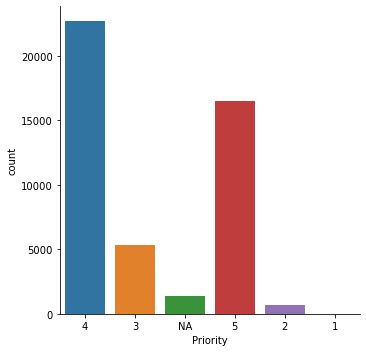

In [33]:
sns.catplot('Priority', data = df, kind = 'count')

In [34]:
Counter(df.Priority)    # dependant variable

Counter({'4': 22717, '3': 5323, 'NA': 1380, '5': 16486, '2': 697, '1': 3})

- In dependant variable(Priority feature) having 6 n_neighbours  which is more than the n_samples=2...So we have to decrease the n_neighbours into 2

- Making 2 groups i.e 0,1
- Considering 
  * 0 as low Priority
  * 1 as high Priority
- So Replacing 
  * NA,1,2 as 0
  *  3,4,5 as 1

In [35]:
y_data1=df['Priority'].replace({'NA':0,'1':0,'2':0,'3':1,'4':1,'5':1})    


In [36]:
y_data1

0        1
1        1
2        0
3        1
4        1
        ..
46601    1
46602    1
46603    1
46604    1
46605    1
Name: Priority, Length: 46606, dtype: int64

In [37]:
Counter(y_data1)  

Counter({1: 44526, 0: 2080})

In [38]:
df.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'Alert_Status', 'No_of_Reassignments',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents'],
      dtype='object')

In [39]:
df.drop(['Priority'],axis=1,inplace=True)

In [40]:
df.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'number_cnt',
       'Category', 'Alert_Status', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents'],
      dtype='object')

In [41]:
frames = [df,y_data1]
data = pd.concat(frames,axis=1)

In [42]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,Priority
0,12,58,0,3,3,28044,1,0,20,4201,0,3526,3659,19911,7,1,10,1
1,2,58,0,2,2,19341,1,0,27,12770,76,1181,1222,21448,11,1,1,1
2,2,11,0,5,2,24089,3,0,23,32203,0,13274,13734,22732,5,1,0,0
3,2,58,0,3,3,29998,1,0,6,18529,0,15382,15862,21363,6,1,0,1
4,2,58,0,3,3,16110,1,0,13,10522,0,8422,8699,18369,7,1,0,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CI_Cat                      46606 non-null  int32
 1   CI_Subcat                   46606 non-null  int32
 2   Status                      46606 non-null  int32
 3   Impact                      46606 non-null  int32
 4   Urgency                     46606 non-null  int32
 5   number_cnt                  46606 non-null  int32
 6   Category                    46606 non-null  int32
 7   Alert_Status                46606 non-null  int32
 8   No_of_Reassignments         46606 non-null  int32
 9   Open_Time                   46606 non-null  int32
 10  Reopen_Time                 46606 non-null  int32
 11  Resolved_Time               46606 non-null  int32
 12  Close_Time                  46606 non-null  int32
 13  Handle_Time_hrs             46606 non-null  int32
 14  Closur

### Feature Scaling

##### Check Distribution : Normalization


In [44]:
X = data.iloc[ : , :-1] #independent columns
y = data["Priority"]   #target column 

In [45]:
X.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'number_cnt',
       'Category', 'Alert_Status', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents'],
      dtype='object')

In [46]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Priority, dtype: int64

In [47]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
#Convert to table format - MinMaxScaler
data_MinMax = pd.DataFrame(data=scaled_features, 
                            columns=['CI_Cat','CI_Subcat','Status','Impact','Urgency','number_cnt',
                                     'Category','Alert_Status','No_of_Reassignments','Open_Time','Reopen_Time',
                                     'Resolved_Time','Close_Time','Handle_Time_hrs','Closure_Code','No_of_Related_Interactions',
                                     'No_of_Related_Incidents'])
data_MinMax

,CI_Cat,CI_Subcat,Status,Impact,Urgency,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents
0,1.000000,0.906250,0.0,0.6,0.6,0.601738,0.333333,0.0,0.487805,0.121293,0.000000,0.104856,0.105975,0.649879,0.500000,0.020408,0.416667
1,0.166667,0.906250,0.0,0.4,0.4,0.414998,0.333333,0.0,0.658537,0.368702,0.033868,0.035121,0.035393,0.700046,0.785714,0.020408,0.041667
2,0.166667,0.171875,0.0,1.0,0.4,0.516876,1.000000,0.0,0.560976,0.929782,0.000000,0.394742,0.397776,0.741954,0.357143,0.020408,0.000000
3,0.166667,0.906250,0.0,0.6,0.6,0.643665,0.333333,0.0,0.146341,0.534979,0.000000,0.457430,0.459409,0.697271,0.428571,0.020408,0.000000
4,0.166667,0.906250,0.0,0.6,0.6,0.345671,0.333333,0.0,0.317073,0.303797,0.000000,0.250454,0.251948,0.599550,0.500000,0.020408,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,0.166667,0.718750,0.0,0.6,0.6,0.233687,0.333333,0.0,0.024390,0.986661,0.000000,0.985161,0.985229,0.010804,0.500000,0.020408,0.000000
46602,0.166667,0.718750,0.0,0.6,0.6,0.806759,0.333333,0.0,0.024390,0.986459,0.000000,0.984298,0.984331,0.048861,0.928571,0.020408,0.000000
46603,0.333333,0.343750,0.0,0.8,0.8,0.916640,0.333333,0.0,0.024390,0.986545,0.000000,0.984358,0.984389,0.008095,0.142857,0.020408,0.000000
46604,0.166667,0.906250,0.0,0.6,0.6,0.701191,0.333333,0.0,0.024390,0.986574,0.000000,0.984566,0.984621,0.013284,0.785714,0.020408,0.000000


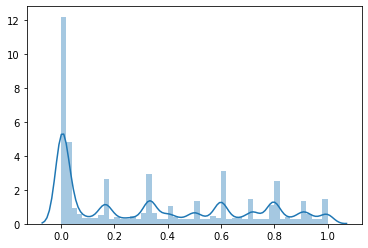

In [48]:
# seaborn plot for dataset
sns.distplot(data_MinMax)

In [49]:
#skewness for dataset
skewness = stats.skew(data_MinMax)
skewness

array([ 1.43787157e+00, -1.15816573e+00,  7.19405632e+01, -3.06528019e-01,
       -5.47764792e-01,  1.04760601e-16,  1.58000124e+00,  0.00000000e+00,
        1.98512765e+00,  1.68132328e-02,  5.60581790e+00,  1.98911473e-02,
        1.47657962e-03,  3.13124493e-01, -3.69996575e-01,  4.82642796e+00,
        1.92722080e+01])

In [50]:
#kurtosis for dataset
kurtosis = stats.kurtosis(data_MinMax)
kurtosis

array([ 2.19285532e-01,  3.53177235e-02,  5.17344464e+03,  2.42089113e-01,
       -1.24205635e-01, -1.20000000e+00,  5.02061570e-01, -3.00000000e+00,
        2.78530990e+00, -1.20198975e+00,  3.18790980e+01, -1.21816272e+00,
       -1.20422131e+00, -1.21783778e+00, -6.28535708e-01,  2.81206882e+01,
        4.13297554e+02])

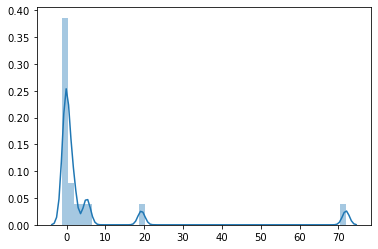

In [51]:
# seaborn plot for skewness for dataset 
sns.distplot(skewness)

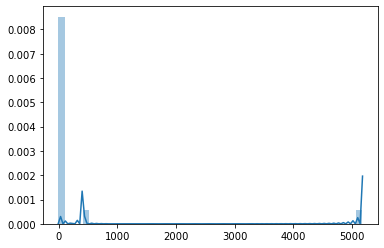

In [52]:
# seaborn plot for kurtosis for dataset 
sns.distplot(kurtosis)

### Feature Engg

##### Feature Selection :

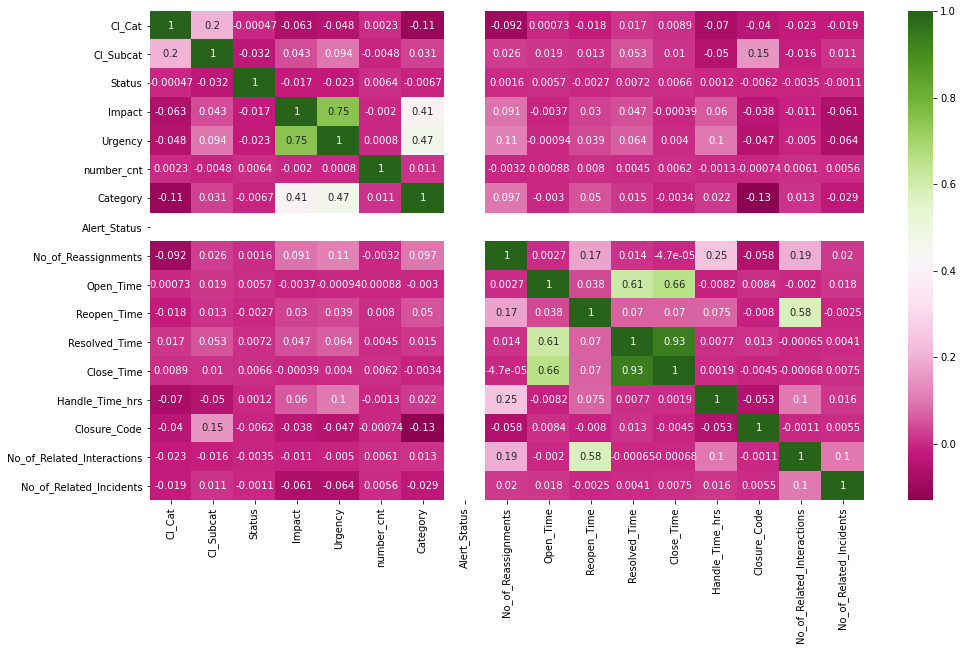

In [53]:
# Check Correlation Matrix using pearson correlation
corr = df.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(16,9))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="PiYG")

In [54]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'number_cnt',
       'Category', 'Alert_Status', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'Priority'],
      dtype='object')

In [55]:
# Feature Importance
X = data.iloc[ : , :-1] #independent columns
y = data["Priority"]   #target column 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [56]:
X.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents
0,12,58,0,3,3,28044,1,0,20,4201,0,3526,3659,19911,7,1,10
1,2,58,0,2,2,19341,1,0,27,12770,76,1181,1222,21448,11,1,1
2,2,11,0,5,2,24089,3,0,23,32203,0,13274,13734,22732,5,1,0
3,2,58,0,3,3,29998,1,0,6,18529,0,15382,15862,21363,6,1,0
4,2,58,0,3,3,16110,1,0,13,10522,0,8422,8699,18369,7,1,0


In [57]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Priority, dtype: int64

[6.23166901e-03 1.87160541e-02 1.88354652e-04 6.61956535e-01
 2.65751048e-01 2.51974877e-03 4.69424296e-03 0.00000000e+00
 2.32351014e-03 2.59963500e-03 7.76053403e-04 5.65925995e-03
 3.69173858e-03 4.86142726e-03 1.56906243e-02 1.63163698e-03
 2.70846206e-03]


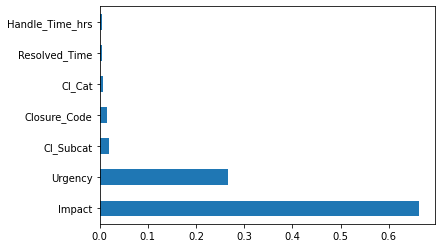

In [58]:
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

- After Visualize Above Plots, These Features Are Highly Correlated With Target Feature 'Priority'

##### Removing Less Correlated Features

In [59]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'number_cnt',
       'Category', 'Alert_Status', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'Priority'],
      dtype='object')

In [60]:
## remove less correlated features
data.drop(['Status','number_cnt','Alert_Status','No_of_Reassignments','Open_Time','Reopen_Time','Resolved_Time',
        'Close_Time','No_of_Related_Interactions','No_of_Related_Incidents'],
      axis=1,inplace = True) 

In [61]:
data.head()

,CI_Cat,CI_Subcat,Impact,Urgency,Category,Handle_Time_hrs,Closure_Code,Priority
0,12,58,3,3,1,19911,7,1
1,2,58,2,2,1,21448,11,1
2,2,11,5,2,3,22732,5,0
3,2,58,3,3,1,21363,6,1
4,2,58,3,3,1,18369,7,1


In [62]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Impact', 'Urgency', 'Category',
       'Handle_Time_hrs', 'Closure_Code', 'Priority'],
      dtype='object')

### Model Selection and Building


##### Defining X and y

In [63]:
X = data.iloc[ : , :-1]

In [64]:
y = data["Priority"]    #target column 


In [65]:
X.head()

,CI_Cat,CI_Subcat,Impact,Urgency,Category,Handle_Time_hrs,Closure_Code
0,12,58,3,3,1,19911,7
1,2,58,2,2,1,21448,11
2,2,11,5,2,3,22732,5
3,2,58,3,3,1,21363,6
4,2,58,3,3,1,18369,7


In [66]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Priority, dtype: int64

##### Splitting the Data

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5,test_size=0.3)

In [68]:
# shape of train test data
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (32624, 7)
X_test shape (13982, 7)
y_train shape (32624,)
y_test shape (13982,)


##### Handle Imbalance Data

In [69]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [70]:
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({1: 31161, 0: 1463})
Counter({1: 31161, 0: 31161})


In [71]:
# shape of train test data
print("X_train Shape Before SMOTE = ", X_train.shape)
print("y_train Shape Before SMOTE = ", y_train.shape)
print("X_train Shape After SMOTE = ", X_train_smote.shape)
print("y_train Shape After SMOTE = ", y_train_smote.shape)

X_train Shape Before SMOTE =  (32624, 7)
y_train Shape Before SMOTE =  (32624,)
X_train Shape After SMOTE =  (62322, 7)
y_train Shape After SMOTE =  (62322,)


- Data is balanced

##### Creating and Training the Model

##### Hyperparameter Tuning Using GridSerchCV

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [73]:
model=RandomForestClassifier()
parameters={'max_depth': [10, 20],
           'n_estimators':[200, 500],
           'random_state': [1,2]}
grid = GridSearchCV(model,parameters,cv=2,verbose=True)
grid.fit(X_train_smote,y_train_smote)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.9min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'n_estimators': [200, 500],
                         'random_state': [1, 2]},
             verbose=True)

In [74]:
grid.best_score_

0.999951862905555

In [75]:
grid.best_params_

{'max_depth': 20, 'n_estimators': 200, 'random_state': 1}

In [76]:
grid.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=1)

- This is Best Parameter For Random Forest Classifier For Model Fitting

##### Fitting the Model

In [77]:
model = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2)
model.fit(X_train_smote,y_train_smote)
model.score(X_train_smote,y_train_smote)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9997854384208268

### Model Evaluation :•For Classification Problem

##### 1. Accuracy Score

In [78]:
# acuracy score
accuracy_score(y_test,y_predict)

0.9997854384208268

##### 2. Confusion Matrix

In [79]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({1: 13365, 0: 617})


col_0,0,1
Priority,,
0,616,1
1,2,13363


In [80]:
confusion_matrix(y_test,y_predict)

array([[  616,     1],
       [    2, 13363]], dtype=int64)

##### 3. Error Rate

In [81]:
# errrors
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

0.00021456157917322272
0.014647920643327596


#####  4. Precision Score

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Precision 
print('Precision: %.3f' % precision_score(y_test,y_predict))

Precision: 1.000


##### 5. Recall Score

In [83]:
# Recall 
print('Recall: %.3f' % recall_score(y_test,y_predict))

Recall: 1.000


##### 6. F1 Score

In [84]:
# F1_score 
print('F1_score: %.3f' % f1_score(y_test,y_predict))

F1_score: 1.000


##### 7. Evaluating Precision, recall,F1 score matrix

In [85]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       617
           1       1.00      1.00      1.00     13365

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



##### 9. ROC AUC Score & Curve

In [86]:
model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [87]:
model.predict_proba(X_test)

array([[2.96313888e-04, 9.99703686e-01],
       [0.00000000e+00, 1.00000000e+00],
       [3.52264729e-04, 9.99647735e-01],
       ...,
       [2.88173069e-04, 9.99711827e-01],
       [6.96296335e-04, 9.99303704e-01],
       [0.00000000e+00, 1.00000000e+00]])

In [88]:
y_predict_th2 = np.where(model.predict_proba(X_test)[:,1]>0.2,1,0) # Threshold is 0.2
y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [89]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
Priority,,
0,616,1
1,2,13363


In [90]:
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [91]:
# thresholds
for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[   11   606]
 [    0 13365]]
Threshold : 0.1
[[  611     6]
 [    0 13365]]
Threshold : 0.2
[[  616     1]
 [    0 13365]]
Threshold : 0.30000000000000004
[[  616     1]
 [    2 13363]]
Threshold : 0.4
[[  616     1]
 [    2 13363]]
Threshold : 0.5
[[  616     1]
 [    2 13363]]
Threshold : 0.6000000000000001
[[  617     0]
 [    3 13362]]
Threshold : 0.7000000000000001
[[  617     0]
 [    5 13360]]
Threshold : 0.8
[[  617     0]
 [    6 13359]]
Threshold : 0.9
[[  617     0]
 [   35 13330]]
Threshold : 1.0
[[  617     0]
 [13365     0]]


In [92]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize

In [93]:
probs = model.predict_proba(X_test)
y_score = probs
y=label_binarize(y, classes=[0,1])
print(y)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [94]:
fpr = {}
tpr = {}
threshold = {}
roc_auc_score = {}

In [95]:
for i in range(0,2):
    fpr[i], tpr[i],threshold[i] = roc_curve(y_test,y_score[:,i], pos_label=i)
    roc_auc_score = auc(fpr[i],tpr[i])

In [96]:
print(roc_auc_score)

0.9999997574641912


In [97]:
fpr

{0: array([0.        , 0.        , 0.        , ..., 0.86217733, 0.89517396,
        1.        ]),
 1: array([0.        , 0.        , 0.        , ..., 0.98055105, 0.9821718 ,
        1.        ])}

In [98]:
tpr

{0: array([0.        , 0.0178282 , 0.01944895, ..., 1.        , 1.        ,
        1.        ]),
 1: array([0.        , 0.10482604, 0.13782267, ..., 1.        , 1.        ,
        1.        ])}

In [99]:
threshold

{0: array([2.00000000e+00, 1.00000000e+00, 9.99819072e-01, ...,
        2.43072436e-06, 1.88323917e-06, 0.00000000e+00]),
 1: array([2.00000000e+00, 1.00000000e+00, 9.99998117e-01, ...,
        2.91031538e-04, 1.80927818e-04, 0.00000000e+00])}

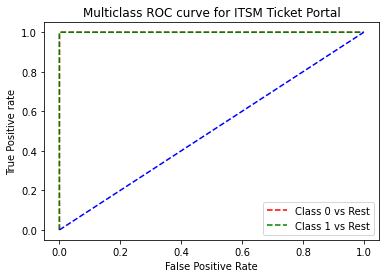

In [100]:
# plot of ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest') 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Multiclass ROC curve for ITSM Ticket Portal') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.legend(loc='best') 
plt.savefig('Multiclass ROC',dpi=500);

### Time Series Forcasting

In [101]:
data1.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [102]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [103]:
# Imporing the necessary columns
itsm= data1.loc[:,['Incident_ID','Open_Time']]

In [104]:
# Imporing the necessary columns
itsm = itsm.loc[:,['Incident_ID','Open_Time']]
itsm

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01
...,...,...
46601,IM0047053,31-03-2014 16:23
46602,IM0047054,31-03-2014 15:03
46603,IM0047055,31-03-2014 15:28
46604,IM0047056,31-03-2014 15:35


- Important Columns for time sereis 

In [105]:
import datetime as dt

- All the values Coverting in proper Datetime format

In [106]:
for i in range(len(itsm.Open_Time)):
    if (itsm.Open_Time[i][1]=='/'):
        itsm.Open_Time[i] = dt.datetime.strptime(itsm.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (itsm.Open_Time[i][2]=='/'):
        itsm.Open_Time[i] = dt.datetime.strptime(itsm.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        itsm.Open_Time[i] = dt.datetime.strptime(itsm.Open_Time[i],'%d-%m-%Y %H:%M').date()

In [107]:
itsm.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


- Adding a new column which will have the number of tickets per day

In [108]:
itsm['No_incidents'] = itsm.groupby('Open_Time')['Incident_ID'].transform('count')

In [109]:
itsm.drop(['Incident_ID'],axis=1,inplace=True)
itsm.drop_duplicates(inplace=True)

In [110]:
itsm.head()

,Open_Time,No_incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2


In [111]:
itsm.shape

(331, 2)

- Setting date as the index

In [112]:
itsm = itsm.set_index('Open_Time')
itsm.index = pd.to_datetime(itsm.index)
itsm.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [113]:
itsm.head()

,No_incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [114]:
# Checking range of dates for our values
print(itsm.index.min(),'to',itsm.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


- Range of dates

- Making a new Series with frequency as Day

In [115]:
data = itsm['No_incidents']
data = data.asfreq('D')
data.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [116]:
data.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_incidents, dtype: float64

- Plotting number of tickets per day

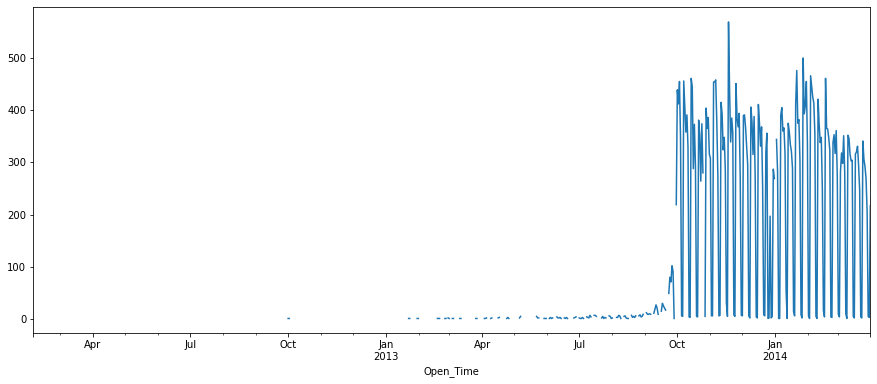

In [117]:
data.plot(figsize=(15,6))
plt.show()

- Since not many tickets before October 2013, we consider only the latter values

In [118]:
from2013 = itsm[itsm.index > dt.datetime(2013,10,1)]

In [119]:
from2013.head()

,No_incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


- Taking New series which have tickets after October 2013

In [120]:
# new Series
data = from2013['No_incidents']
data = data.asfreq('D')
data.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

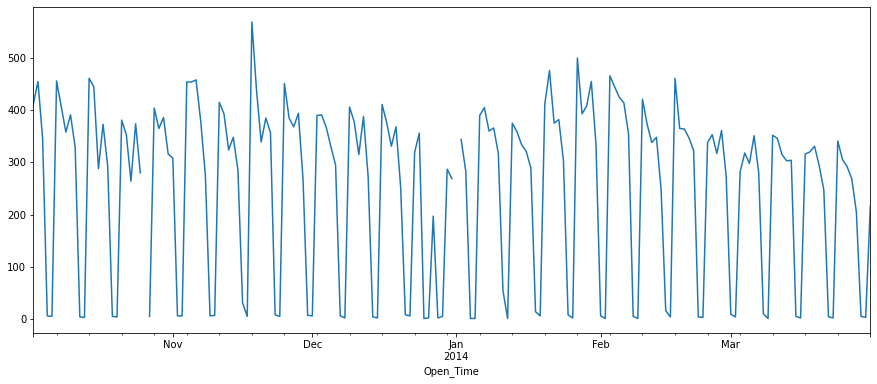

In [121]:
# Plotting number of tickets per day after October 2013
data.plot(figsize=(15,6))
plt.show()

In [122]:
from2013.shape

(179, 1)

In [123]:
data.shape

(181,)

- Making a list of values for p,d & q

In [124]:
import itertools
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [125]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.7853824722297
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.1363346533485
ARIMA(1, 0, 0) - AIC:2365.2916469365928
ARIMA(1, 0, 1) - AIC:2337.312508693355
ARIMA(1, 1, 0) - AIC:2373.1280680651544
ARIMA(1, 1, 1) - AIC:2294.4315812436853


- Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting

In [126]:
mod = sm.tsa.statespace.SARIMAX(data,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.735      2.576      0.010    6023.506    4.44e+04


- Predicting the future values and the confidence interval

In [127]:
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Length: 242, dtype: float64

## Visualization

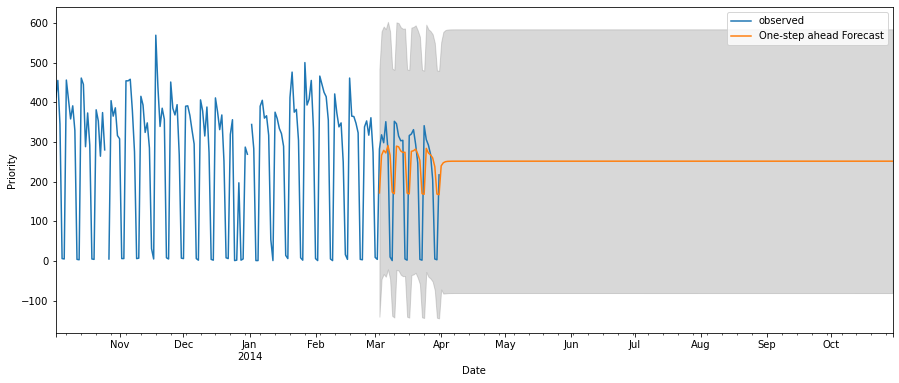

In [128]:
ax = data['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Priority')
plt.legend()
plt.show()

# 3.Predicting Request for change

In [129]:
data1.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [130]:
data1.shape

(46606, 25)

In [131]:
data1.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [132]:
# Selecting the predictors
X1 = data1.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = data1.No_of_Related_Changes

In [133]:
y1.head()

0    
1    
2    
3    
4    
Name: No_of_Related_Changes, dtype: object

## converting Cat into numerical

In [134]:
enc= LabelEncoder()
data1['CI_Subcat'] = enc.fit_transform(data1['CI_Subcat'])
data1['WBS'] = enc.fit_transform(data1['WBS'])
data1['Category'] = enc.fit_transform(data1['Category'])

- removing null values by replacing them

In [135]:
data1.No_of_Related_Interactions.replace('',1,inplace=True)
data1.Priority.replace('NA',4,inplace=True)
data1.No_of_Related_Incidents.replace('',0,inplace=True)


- decresing the N_neighbours into 2 groups 

In [136]:
data1.No_of_Related_Changes.replace({'':0,'2':1,'3':1,'9':1},inplace=True)

In [137]:
X1 = data1.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = data1.No_of_Related_Changes

In [138]:
data1['CI_Subcat'].value_counts()

46    18811
58    15311
11     3876
22     1921
43     1199
      ...  
39        1
40        1
53        1
19        1
56        1
Name: CI_Subcat, Length: 65, dtype: int64

In [139]:
data1['Category'].value_counts()

1    37748
3     8846
0       11
2        1
Name: Category, dtype: int64

In [140]:
data1['No_of_Related_Changes'].value_counts()

0    46046
1      560
Name: No_of_Related_Changes, dtype: int64

In [141]:
data1['No_of_Related_Incidents'].value_counts()

0     45384
1      1057
2        74
3        20
4        13
5         8
6         8
9         6
8         5
11        4
12        4
7         4
17        3
16        3
10        2
24        2
26        1
13        1
14        1
25        1
63        1
23        1
54        1
15        1
21        1
Name: No_of_Related_Incidents, dtype: int64

In [142]:
data1['No_of_Related_Interactions'].value_counts()

1      43058
2       2736
3        429
4        124
1        114
5         30
6         16
7         12
8          6
12         6
9          5
20         5
13         4
42         3
15         3
10         3
19         3
22         3
16         2
17         2
23         2
18         2
14         2
28         2
33         2
26         2
45         2
34         2
29         2
44         2
11         2
39         2
30         1
88         1
25         1
288        1
370        1
21         1
118        1
57         1
24         1
54         1
41         1
74         1
31         1
55         1
37         1
40         1
43         1
27         1
Name: No_of_Related_Interactions, dtype: int64

In [143]:
X1.head()

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,58,137,4,1,1,2
1,58,70,3,1,1,1
2,11,74,4,3,1,0
3,58,70,4,1,1,0
4,58,70,4,1,1,0


In [144]:
# Splitting into train and test for calculating the accuracy
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

In [145]:
# Standardization technique is used
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [146]:
X1_train.shape

(32624, 6)

In [147]:
X1_test.shape

(13982, 6)

# Training the model

In [148]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [149]:
# Predicting the model
y1_predict_rf = model1_rf.predict(X1_test)

In [150]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_rf))
print(classification_report(y1_test,y1_predict_rf))

0.9891288799885567
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13835
           1       0.31      0.03      0.05       147

    accuracy                           0.99     13982
   macro avg       0.65      0.51      0.52     13982
weighted avg       0.98      0.99      0.98     13982



##### we predicted ITSM ticket priority with 99% accuracy